In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## CSV파일 로드

In [104]:
df = pd.read_csv("/Users/ohheungchan/workspace/AI_Study/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


## 결측치 확인

In [105]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

### 컬럼 설명

1. **Sex**: 전복의 성별 (M: 수컷, F: 암컷, I: 새끼)
2. **Length**: 전복의 최대 길이 (밀리미터 단위)
3. **Diameter**: 전복의 지름, 길이에 수직인 측정치 (밀리미터 단위)
4. **Height**: 전복의 높이, 껍질 속 고기 포함 (밀리미터 단위)
5. **Whole weight**: 전복 전체의 무게 (그램 단위)
6. **Shucked weight**: 전복 고기의 무게 (그램 단위)
7. **Viscera weight**: 전복의 내장 무게, 출혈 후 측정 (그램 단위)
8. **Shell weight**: 건조 후 전복 껍질의 무게 (그램 단위)
9. **Rings**: 전복의 고리 수, 나이 추정의 기준 (+1.5년)

In [106]:
df.info

<bound method DataFrame.info of      Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
id                                                                 
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  Rings  
id                                     

In [107]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

### 인코딩 (문자->수치)

In [108]:
# 'Sex'컬럼의 F/M을 수치화
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Sex'] = label.fit_transform(df['Sex'])

(M->0, F->2, I->1)

/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_6583/2749004283.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rings', data=df, palette='Set3')


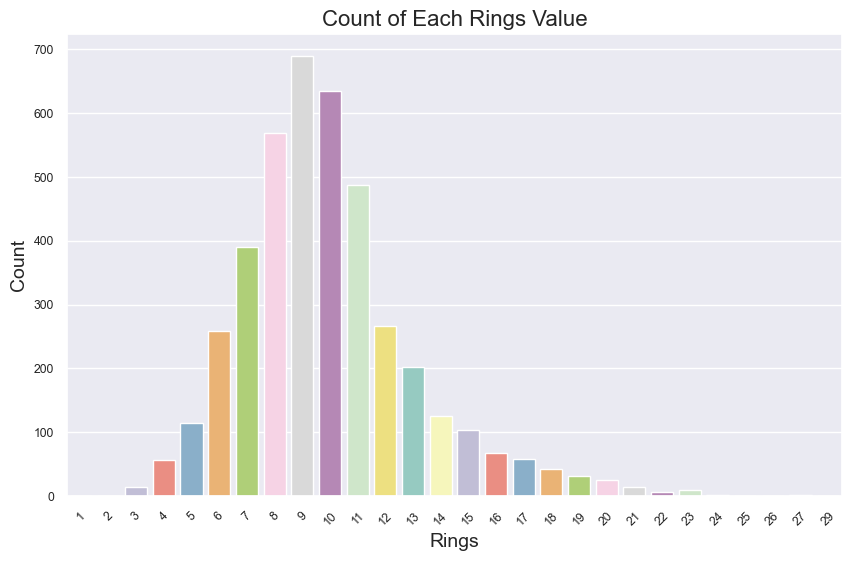

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# 카운트플롯 그리기
plt.figure(figsize=(10, 6))
sns.countplot(x='Rings', data=df, palette='Set3')
plt.title('Count of Each Rings Value', fontsize=16)
plt.xlabel('Rings', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)  # x축 값이 겹치지 않도록 회전
plt.show()

## 각 피쳐간의 상관관계를 확인.

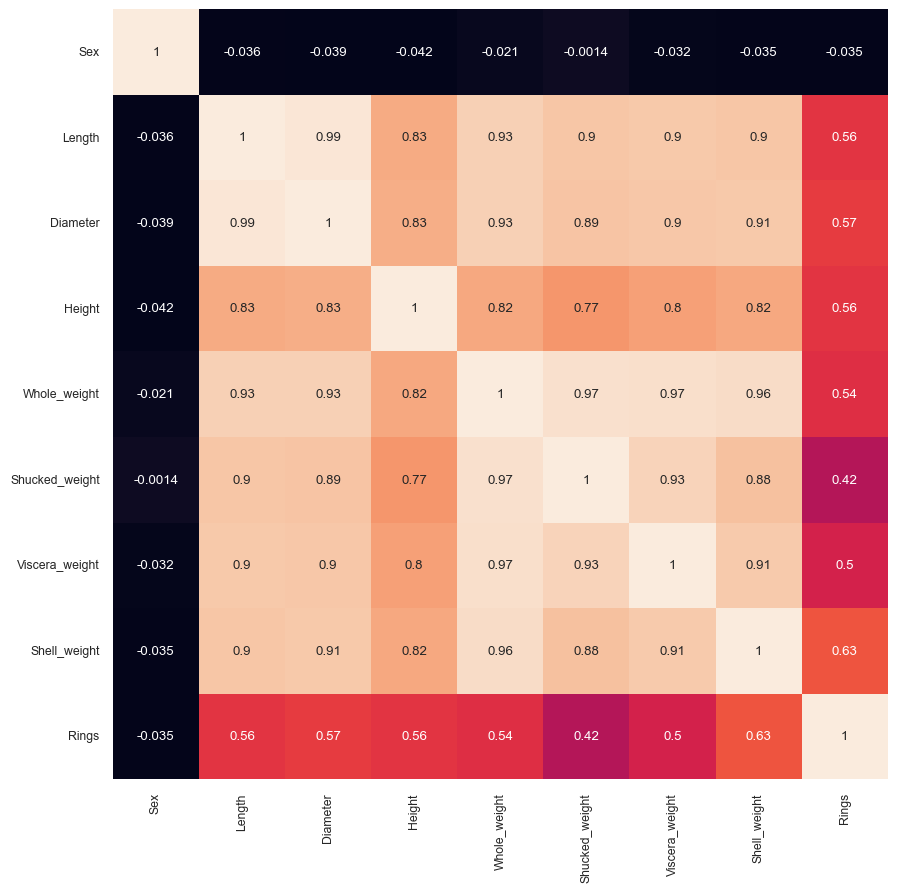

In [110]:
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [126]:
y = df["Rings"]
y 

id
0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [127]:
import pandas as pd

# y에 원핫인코딩 적용
y_onehot = pd.get_dummies(y)

y_onehot.head()

,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,29
id,,,,,,,,,,,,,,,,,,,,,
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [128]:
y = y_onehot

In [129]:
y.value_counts()

1      2      3      4      5      6      7      8      9      10     11     12     13     14     15     16     17     18     19     20     21     22     23     24     25     26     27     29   
False  False  False  False  False  False  False  False  True   False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False    689
                                                        False  True   False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False    634
                                                 True   False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False    568
                                                 False  False  False  True   False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False    4

In [130]:
x = df.drop("Rings" , axis = 1)
x

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080


In [131]:
print(x.shape)
print(y.shape)

(4177, 8)
(4177, 28)


In [132]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0) 

In [139]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(7,input_shape=(8,),activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(28,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 7)                 63        
                                                                 
 dense_69 (Dense)            (None, 10)                80        
                                                                 
 dense_70 (Dense)            (None, 10)                110       
                                                                 
 dense_71 (Dense)            (None, 28)                308       
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


In [140]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_train,y_train))
y_pred = model.predict(X_test) 

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
  1/105 [..............................] - ETA: 36s - loss: 3.3265 - accuracy: 0.0938

2024-09-19 10:01:26.523778: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


105/105 [==============================] - ETA: 0s - loss: 2.4140 - accuracy: 0.1937

2024-09-19 10:01:28.030442: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


105/105 [==============================] - 3s 22ms/step - loss: 2.4140 - accuracy: 0.1937 - val_loss: 2.1681 - val_accuracy: 0.2278
Epoch 2/30
105/105 [==============================] - 2s 19ms/step - loss: 2.1312 - accuracy: 0.2368 - val_loss: 2.0443 - val_accuracy: 0.2472
Epoch 3/30
105/105 [==============================] - 2s 19ms/step - loss: 2.0809 - accuracy: 0.2418 - val_loss: 2.0672 - val_accuracy: 0.2526
Epoch 4/30
105/105 [==============================] - 2s 20ms/step - loss: 2.0514 - accuracy: 0.2499 - val_loss: 2.0021 - val_accuracy: 0.2649
Epoch 5/30
105/105 [==============================] - 2s 19ms/step - loss: 2.0714 - accuracy: 0.2397 - val_loss: 2.0255 - val_accuracy: 0.2317
Epoch 6/30
105/105 [==============================] - 2s 19ms/step - loss: 2.0259 - accuracy: 0.2409 - val_loss: 1.9775 - val_accuracy: 0.2601
Epoch 7/30
105/105 [==============================] - 2s 20ms/step - loss: 2.0237 - accuracy: 0.2595 - val_loss: 2.0213 - val_accuracy: 0.2496
Epoch 8/30

2024-09-19 10:02:28.150007: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


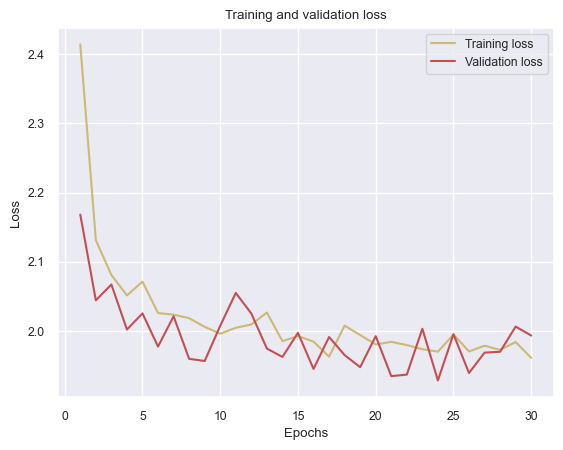

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

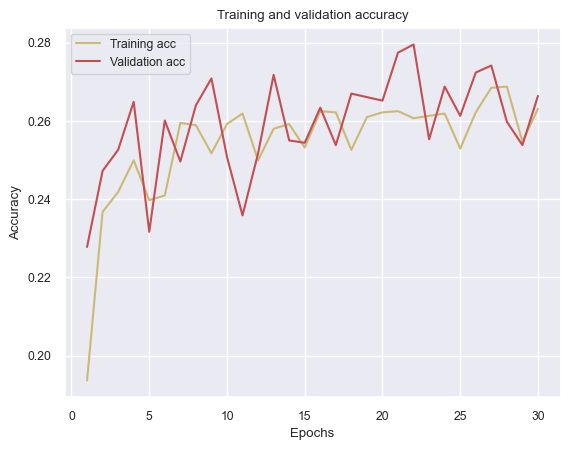

In [142]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [143]:

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         5
           3       0.20      0.18      0.19        11
           4       0.44      0.24      0.31        33
           5       0.00      0.00      0.00        47
           6       0.38      0.60      0.46        98
           7       0.31      0.64      0.41       113
           8       0.26      0.33      0.29       127
           9       0.15      0.12      0.14       107
          10       0.21      0.28      0.24        95
          11       0.00      0.00      0.00        66
          12       0.09      0.10      0.10        39
          13       0.00      0.00      0.00        26
          14       0.00      0.00      0.00        18
          15       0.00      0.00      0.00        14
          16       0.00      0.00      0.00        10
          17       0.00      0.00      0.00         5
          18       0.00      0.00      0.00         8
          19       0.00    

/Users/ohheungchan/anaconda3/envs/tf29_py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ohheungchan/anaconda3/envs/tf29_py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ohheungchan/anaconda3/envs/tf29_py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## label을 구간화

-8,9-10,11- 으로 구간화를 함. 

In [144]:
print (df.columns)
df = df.drop(columns=['Sex']) # Sex 특성 제거

for ix in df.index :
    row = df.loc[ix]
    if row.Rings <= 8:
        df.loc[ix, 'Rings'] = 'young'
    elif row.Rings >= 11:
        df.loc[ix, 'Rings'] = 'old'
    elif row.Rings >=9 & row.Rings <= 10:
        df.loc[ix, 'Rings'] = 'medium'
        
df.head()

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')


/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_6583/3874682361.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'old' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[ix, 'Rings'] = 'old'


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,old
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,young
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,medium
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,medium
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,young


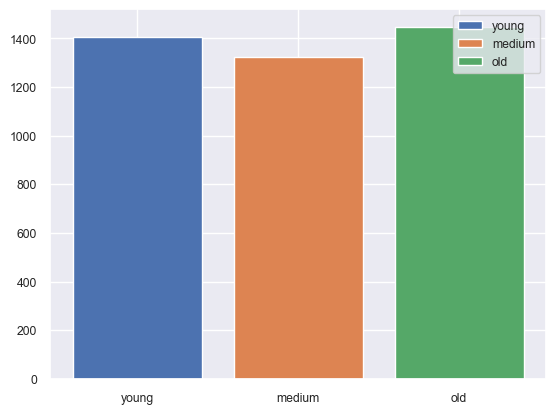

In [80]:
plt.bar("young", len(df[df['Rings'] == 'young']), label="young")
plt.bar("medium", len(df[df['Rings'] == 'medium']), label="medium")
plt.bar("old", len(df[df['Rings'] == 'old']), label="old")
plt.legend()
plt.show()

In [81]:
y = df["Rings"]
y 

id
0          old
1        young
2       medium
3       medium
4        young
         ...  
4172       old
4173    medium
4174    medium
4175    medium
4176       old
Name: Rings, Length: 4177, dtype: object

In [82]:
x = df.drop("Rings" , axis = 1)
x

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080


In [83]:
import pandas as pd

# y에 원핫인코딩 적용
y_onehot = pd.get_dummies(y)

y_onehot.head()

,medium,old,young
id,,,
0,False,True,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,False,True


In [84]:
y = y_onehot

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0) 

In [97]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(7,input_shape=(7,),activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(3,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 7)                 56        
                                                                 
 dense_41 (Dense)            (None, 10)                80        
                                                                 
 dense_42 (Dense)            (None, 10)                110       
                                                                 
 dense_43 (Dense)            (None, 3)                 33        
                                                                 
Total params: 279
Trainable params: 279
Non-trainable params: 0
_________________________________________________________________


/Users/ohheungchan/anaconda3/envs/tf29_py39/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [98]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=16,validation_data= (X_train,y_train))
y_pred = model.predict(X_test) 

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
  1/209 [..............................] - ETA: 1:17 - loss: 1.2634 - accuracy: 0.2500

2024-09-19 09:48:52.239947: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


209/209 [==============================] - ETA: 0s - loss: 0.8963 - accuracy: 0.5480

2024-09-19 09:48:54.705330: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


209/209 [==============================] - 4s 19ms/step - loss: 0.8963 - accuracy: 0.5480 - val_loss: 1.0377 - val_accuracy: 0.4394
Epoch 2/100
209/209 [==============================] - 4s 19ms/step - loss: 0.8581 - accuracy: 0.5855 - val_loss: 0.7924 - val_accuracy: 0.6348
Epoch 3/100
209/209 [==============================] - 4s 19ms/step - loss: 0.8389 - accuracy: 0.6079 - val_loss: 0.8425 - val_accuracy: 0.6034
Epoch 4/100
209/209 [==============================] - 4s 19ms/step - loss: 0.8319 - accuracy: 0.6103 - val_loss: 0.8031 - val_accuracy: 0.6133
Epoch 5/100
209/209 [==============================] - 4s 19ms/step - loss: 0.8196 - accuracy: 0.6082 - val_loss: 0.7860 - val_accuracy: 0.6298
Epoch 6/100
209/209 [==============================] - 4s 19ms/step - loss: 0.8139 - accuracy: 0.6148 - val_loss: 0.8258 - val_accuracy: 0.6390
Epoch 7/100
209/209 [==============================] - 4s 19ms/step - loss: 0.8132 - accuracy: 0.6220 - val_loss: 0.8077 - val_accuracy: 0.6121
Epoc

2024-09-19 09:55:21.162116: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


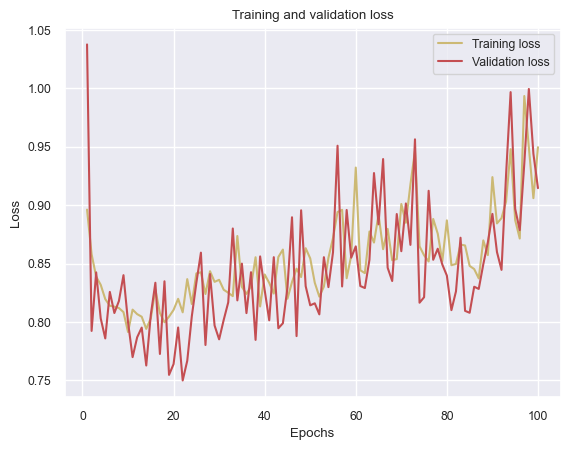

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

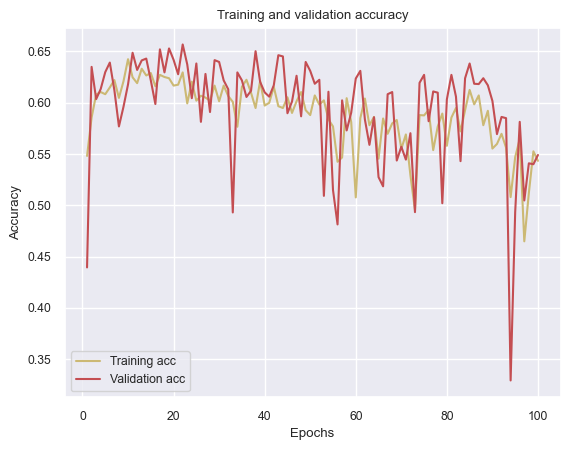

In [101]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [102]:

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.40      0.01      0.02       234
           1       0.48      0.93      0.63       295
           2       0.82      0.69      0.75       307

    accuracy                           0.58       836
   macro avg       0.57      0.54      0.47       836
weighted avg       0.58      0.58      0.50       836

[[  2 206  26]
 [  0 274  21]
 [  3  91 213]]
